## Daten laden


In [5]:
import os
import pandas as pd

HEART_PATH = "#Pfad#"   #Pfad, in dem die Datei liegt
def load_heart_data(heart_path = HEART_PATH):
        csv_path = os.path.join(heart_path,"heart.csv")
        return pd.read_csv(csv_path)

Kurzen Blick auf die Daten werfen

In [6]:
heart = load_heart_data()
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Codeverzeichnis:
age = age in years <br /> 
sex = 0 = male, 1 = female<br />
cp = chest pain: 0 = asymptomatic, 1 = atypical angina, 2 = non-anginal pain, 3 = typical angina<br/>
trtbps = resting blood pressure (in mm Hg on admission to the hospital)<br/>
chol = serum cholesterol in mg/dl<br/>
fbs = fasting blood sugar > 120 mg/dl:	0 = false, 1 = true<br/>
restecg = resting electrocardiographic results: 0 = showing probable or definite left ventricular hypertrophy by Estes' criteria: 1 = normal, 2 = having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)<br/>
thalachh = maximum heart rate achieved<br/>
exng = exercise induced angina:	0 = no, 1 = yes<br/>
oldpeak = ST depression induced by exercise relative to rest<br/>
slp = the slope of the peak exercise ST segment: 0 = downsloping, 1 = flat, 2 = upsloping<br/>
caa = number of major vessels (0-3) colored by flourosopy: ACHTUNG: 4 = Missing value<br/>
thall = thalassemia: 1 = fixed defect, 2 = normal, 3 = reversable defect, 0 = Missing value (ACHTUNG!)<br/>
output = Heart disease:	0 = Heart disease, 1 = No heart disease (!)<br/> 

Insgesamt 303 Fälle im Datensatz.<br/>
Ein Fall (38, 1, 2, 138, 175, 0, 1, 173, 0, 0, 2, 4, 2,	1) doppelt. So nicht im Originaldatensatz.<br/>
Ein Fall (60, 0, 4, 158, 305, 0, 2, 161, 0, 0, 1, 0, 3,	1) fehlt in den Kaggle Daten, ist aber im Original.<br/>

Mit info() kann ein Überblick über die Daten gewonnen werden. Nützlich, um zu sehen, wie viele Fälle und welche Variablen im Datensatz vorhanden sind. Außerdem wird sichtbar, welche Variablen fehlende Werte haben.

In dem Kaggle Datensatz wurden bei zwei Variablen (caa, thall) fehlende Werte durch Zahlen ersetzt. Dies muss rückgängig gemacht werden, um falsche Schätzungen zu vermeiden.

In [19]:
import numpy as np
heart["caa"].replace(4,np.nan, inplace=True)   #ersetzt bei Variable caa den Wert 4 durch nan
heart["thall"].replace(0, np.nan, inplace = True)

In [20]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       298 non-null    float64
 12  thall     301 non-null    float64
 13  output    303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


value_counts() zählt Häufigkeiten verschiedener Werte einer Variable. 
Aus der Datensatzbeschreibung kann man sehen, dass insgesamt bei 164 aus 303 Fällen kein Event auftrat.
Vergleichen mit dem eigenen Datensatz über value_counts():

In [8]:
heart["output"].value_counts()

1    165
0    138
Name: output, dtype: int64

Es ist also ein Fall ohne Event zu viel in den Daten.

Deskriptive Statistik für die Variablen:

In [21]:
heart.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,298.000000,301.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.674497,2.328904,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,0.938202,0.584347,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


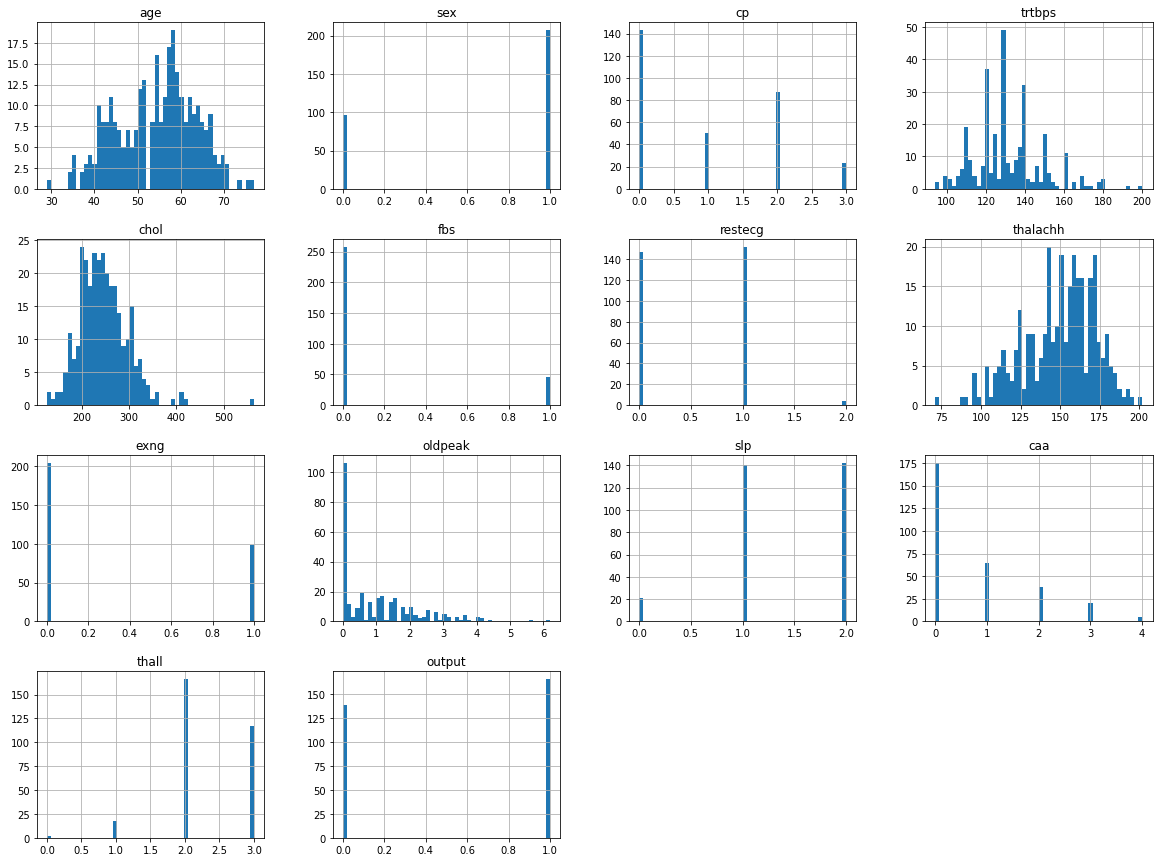

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
heart.hist(bins = 50, figsize=(20,15))
plt.show()

### Training- und Testset erstellen

In [22]:
from sklearn.model_selection import train_test_split
heart_train, heart_test = train_test_split(heart, test_size = 0.2, random_state = 42)

In [23]:
heart_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242 entries, 132 to 102
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       242 non-null    int64  
 1   sex       242 non-null    int64  
 2   cp        242 non-null    int64  
 3   trtbps    242 non-null    int64  
 4   chol      242 non-null    int64  
 5   fbs       242 non-null    int64  
 6   restecg   242 non-null    int64  
 7   thalachh  242 non-null    int64  
 8   exng      242 non-null    int64  
 9   oldpeak   242 non-null    float64
 10  slp       242 non-null    int64  
 11  caa       239 non-null    float64
 12  thall     241 non-null    float64
 13  output    242 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 28.4 KB


In [24]:
heart_train.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,239.000000,241.000000,242.000000
mean,54.462810,0.657025,0.991736,130.359504,246.842975,0.128099,0.553719,150.115702,0.314050,1.013223,1.421488,0.640167,2.311203,0.549587
std,9.204492,0.475687,1.022533,16.828858,52.795465,0.334893,0.530410,22.352398,0.465098,1.102577,0.607724,0.923672,0.576121,0.498566
min,29.000000,0.000000,0.000000,94.000000,131.000000,0.000000,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,212.000000,0.000000,0.000000,136.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.500000,1.000000,1.000000,130.000000,239.500000,0.000000,1.000000,154.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,165.750000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,192.000000,564.000000,1.000000,2.000000,202.000000,1.000000,5.600000,2.000000,3.000000,3.000000,1.000000


In [25]:
heart_train_copy = heart_train.copy()   #erstellt eine Kopie des Datensatzes

<AxesSubplot:xlabel='age', ylabel='chol'>

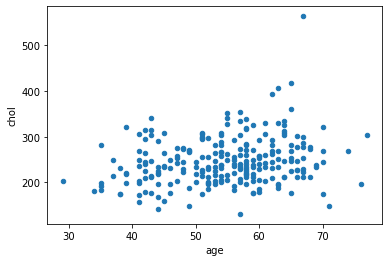

In [26]:
heart_train_copy.plot(kind = "scatter", x = "age", y = "chol")

<AxesSubplot:xlabel='age', ylabel='chol'>

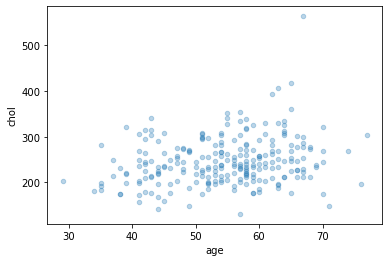

In [28]:
heart_train_copy.plot(kind = "scatter", x = "age", y = "chol", alpha = 0.3) #alpha Option macht Dichte besser sichtbar

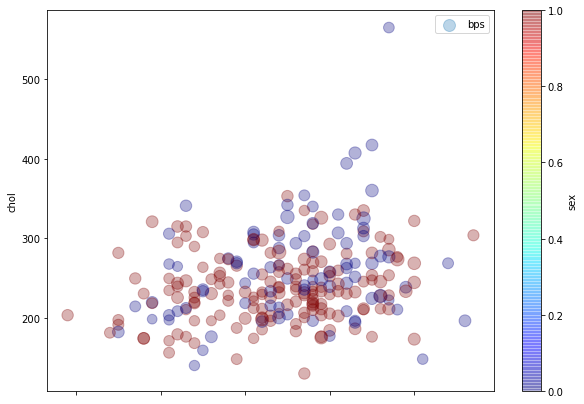

In [31]:
#Möglichkeit noch mehr Informationen in Scatterplot zu packen:
heart_train_copy.plot(kind = "scatter", x = "age", y = "chol", alpha = 0.3, 
                      s = heart_train_copy["trtbps"], label = "bps", figsize=(10,7), #s = Punkte unterschiedlicher Größe (größerer Radius = höherer trtbps)
                      c = "sex",cmap = plt.get_cmap("jet"),colorbar=True) # c  = Punkte unterschiedlich gefärbt
plt.legend()

In [34]:
#Korrelationen (Pearson)
corr_matrix = heart_train_copy.corr()
corr_matrix["age"].sort_values(ascending = False) #Korrelationen für age

age         1.000000
caa         0.374662
trtbps      0.285224
chol        0.231922
oldpeak     0.202352
exng        0.148128
fbs         0.131451
thall       0.063385
sex        -0.099115
cp         -0.103195
restecg    -0.127500
slp        -0.163345
output     -0.233782
thalachh   -0.396378
Name: age, dtype: float64

array([[<AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='chol', ylabel='age'>,
        <AxesSubplot:xlabel='trtbps', ylabel='age'>],
       [<AxesSubplot:xlabel='age', ylabel='chol'>,
        <AxesSubplot:xlabel='chol', ylabel='chol'>,
        <AxesSubplot:xlabel='trtbps', ylabel='chol'>],
       [<AxesSubplot:xlabel='age', ylabel='trtbps'>,
        <AxesSubplot:xlabel='chol', ylabel='trtbps'>,
        <AxesSubplot:xlabel='trtbps', ylabel='trtbps'>]], dtype=object)

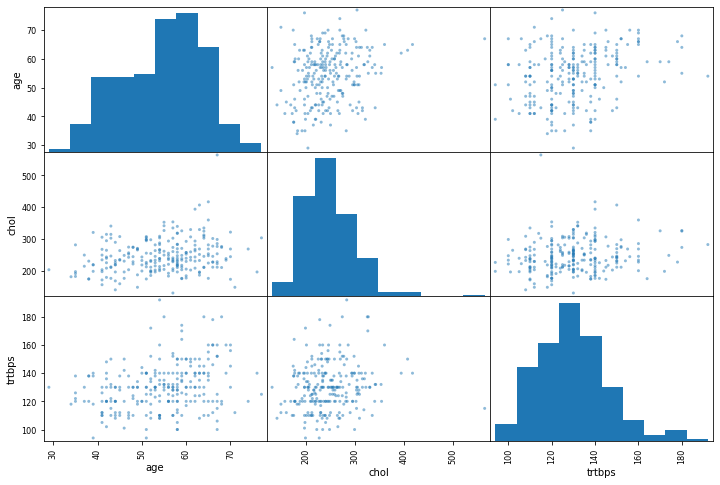

In [37]:
#Scatter matrix
from pandas.plotting import scatter_matrix
attributes = ["age", "chol", "trtbps"] #Variablen, die korreliert werden sollen festlegen
scatter_matrix(heart_train_copy[attributes], figsize=(12,8))

In [39]:
# Abhängige und unabhängige Variablen trennen
heart_train_copy = heart_train.drop("output", axis = 1) #Erstellt eine Kopie des Datensatzes ohne die Variable output
heart_train_lables = heart_train["output"].copy() #Series bestehend aus Variable output

In [42]:
heart_train_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242 entries, 132 to 102
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       242 non-null    int64  
 1   sex       242 non-null    int64  
 2   cp        242 non-null    int64  
 3   trtbps    242 non-null    int64  
 4   chol      242 non-null    int64  
 5   fbs       242 non-null    int64  
 6   restecg   242 non-null    int64  
 7   thalachh  242 non-null    int64  
 8   exng      242 non-null    int64  
 9   oldpeak   242 non-null    float64
 10  slp       242 non-null    int64  
 11  caa       239 non-null    float64
 12  thall     241 non-null    float64
dtypes: float64(3), int64(10)
memory usage: 26.5 KB


In [43]:
#Fehlende Werte imputieren
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy ="median") #Imputiert den Median
imputer.fit(heart_train_copy)

SimpleImputer(strategy='median')

In [47]:
imputer.statistics_

array([ 55.5,   1. ,   1. , 130. , 239.5,   0. ,   1. , 154. ,   0. ,
         0.8,   1. ,   0. ,   2. ])

In [48]:
heart_train_copy.median().values

array([ 55.5,   1. ,   1. , 130. , 239.5,   0. ,   1. , 154. ,   0. ,
         0.8,   1. ,   0. ,   2. ])

In [51]:
X = imputer.transform(heart_train_copy) #Transformierte Trainingsdaten als Numpy Array

In [52]:
heart_train_imputed = pd.DataFrame(X,columns = heart_train_copy.columns,
                                   index = heart_train_copy.index) #Data frame mit transmutierten Variablen

In [53]:
heart_train_imputed.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
132,42.0,1.0,1.0,120.0,295.0,0.0,1.0,162.0,0.0,0.0,2.0,0.0,2.0
202,58.0,1.0,0.0,150.0,270.0,0.0,0.0,111.0,1.0,0.8,2.0,0.0,3.0
196,46.0,1.0,2.0,150.0,231.0,0.0,1.0,147.0,0.0,3.6,1.0,0.0,2.0
75,55.0,0.0,1.0,135.0,250.0,0.0,0.0,161.0,0.0,1.4,1.0,0.0,2.0
176,60.0,1.0,0.0,117.0,230.0,1.0,1.0,160.0,1.0,1.4,2.0,2.0,3.0


In [57]:
# Kategoriale Variablen & Dummies
cp_dum = pd.get_dummies(heart_train_imputed.cp, prefix='cp') # Dummies mittels pd.get_dummies
cp_dum
#Alternativ: sklearn OneHotEncoder

,cp_0.0,cp_1.0,cp_2.0,cp_3.0
132,0,1,0,0
202,1,0,0,0
196,0,0,1,0
75,0,1,0,0
176,1,0,0,0
...,...,...,...,...
188,0,0,1,0
71,0,0,1,0
106,0,0,0,1
270,1,0,0,0
